## Import necessary libraries

In [1]:
from nn import nn, preprocess, io
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

## Create neural network instance

In [2]:
arch = [{'input_dim': 64, 'output_dim': 16, 'activation': 'sigmoid'},
       {'input_dim': 16, 'output_dim': 64, 'activation': 'relu'}] # output layer

lr = 0.001 # Seems like a good place to start
n_seed = 42
batch_size = 10 
epochs = 100
convergence_thresh = 0.0001
loss_fun = 'mse'

nn_ae = nn.NeuralNetwork(arch, lr, n_seed, batch_size, epochs, convergence_thresh, loss_fun)

## Read in the 'digits' dataset using sklearn

In [3]:
digits = load_digits()

<Figure size 432x288 with 0 Axes>

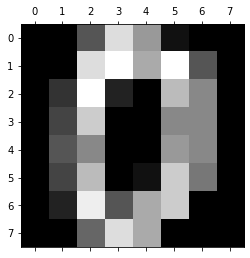

In [4]:
plt.gray()
plt.matshow(digits.images[0])
plt.show() # Let's have a look

In [5]:
X = digits.data
y = digits.target

## Split the 'digits' data into training and validation

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X,y, train_size=0.8) # 80/20 ratio is supposedly standard for training/validation in the field so split it like that

In [7]:
train_loss, train_accuracy, val_loss, val_accuracy = nn_ae.fit(X_train, X_train, X_val, X_val)

Z_curr = (1437, 16)
Z_curr = (1437, 64)
Z_curr = (360, 16)
Z_curr = (360, 64)


/Users/sebastiancruzgonzales/Documents/UCSF/BMI 203/project7/nn/nn.py:460: RuntimeWarning: invalid value encountered in log
  return (1/m) * (-(y/y_hat) + ((1-y) * np.log(1- y_hat)))


ValueError: operands could not be broadcast together with shapes (1437,16) (16,16) 